In [1]:
from pathlib import Path
import pandas as pd
import plotly.express as px


In [2]:
def count_files_by_species(dataset_root: str):
    """
    Parcourt les sous-dossiers 'color', 'grayscale' et 'segmented' du dataset PlantVillage
    et retourne un DataFrame avec le nombre de fichiers par espèce et par modalité.
    """
    root = Path(dataset_root)
    modalities = ['color', 'grayscale', 'segmented']
    records = []

    for mod in modalities:
        mod_path = root / mod
        if not mod_path.exists():
            print(f"⚠️ Le dossier {mod_path} n'existe pas.")
            continue

        for class_dir in mod_path.iterdir():
            if class_dir.is_dir():
                species = class_dir.name.split('___')[0]
                count = sum(1 for f in class_dir.iterdir() if f.is_file())
                records.append({'species': species, 'modality': mod, 'count': count})

    df = pd.DataFrame(records)
    # Pivot si vous préférez un format espèces×modalité :
    pivot = df.pivot_table(index='species', columns='modality', values='count', fill_value=0)
    return df, pivot

    

In [3]:
from pathlib import Path
import pandas as pd
import plotly.express as px

def count_files_by_species(dataset_root):
    root_path = Path(dataset_root)
    records = []
    for modality_dir in root_path.iterdir():
        if modality_dir.is_dir():
            modality = modality_dir.name
            for species_dir in modality_dir.iterdir():
                if species_dir.is_dir():
                    species = species_dir.name
                    count = len(list(species_dir.glob('*')))
                    records.append({'modality': modality, 'species': species, 'count': count})
    df_records = pd.DataFrame(records)
    df_pivot = df_records.pivot(index='species', columns='modality', values='count').fillna(0).astype(int)
    return df_records, df_pivot

dataset_root = '/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset'
df_records, df_pivot = count_files_by_species(dataset_root)

fig1 = px.histogram(
    df_records,
    x='count',
    color='modality',
    barmode='overlay',
    nbins=50,
    title="Distribution du nombre d'images par espèce et modalité",
    labels={'count': "Nombre d'images", 'modality': "Modalité"}
)
fig1.update_layout(
    xaxis_title="Nombre d'images par espèce",
    yaxis_title="Nombre d'espèces",
    legend_title="Modalité"
)
fig1.show()

df_pivot_reset = df_pivot.reset_index().melt(id_vars='species', var_name='modality', value_name='count')

fig2 = px.bar(
    df_pivot_reset,
    x='species',
    y='count',
    color='modality',
    title="Nombre d'images par espèce et modalité (empilé)"
)
fig2.update_layout(
    xaxis_title="Espèce",
    yaxis_title="Nombre d'images",
    legend_title="Modalité"
)
fig2.show()




In [4]:
fig = px.bar(
    df_pivot_reset,
    x='species',
    y='count',
    color='modality',
    barmode='group',
    title="Comparaison du nombre d'images par modalité et espèce"
)
fig.update_layout(xaxis_title="Espèce", yaxis_title="Nombre d'images", legend_title="Modalité")
fig.show()

In [ ]:
from pathlib import Path
import pandas as pd
from PIL import Image  # Bibliothèque pour lire les images

def extract_image_info(dataset_root):
    root_path = Path(dataset_root)
    records = []
    
    for modality_dir in root_path.iterdir():
        if modality_dir.is_dir():
            modality = modality_dir.name
            for species_dir in modality_dir.iterdir():
                if species_dir.is_dir():
                    species = species_dir.name
                    for img_path in species_dir.glob('*'):
                        if img_path.is_file():
                            try:
                                with Image.open(img_path) as img:
                                    width, height = img.size
                                extension = img_path.suffix.lower()  # ex: '.jpg', '.png'
                                records.append({
                                    'modality': modality,
                                    'species': species,
                                    'filename': img_path.name,
                                    'extension': extension,
                                    'width': width,
                                    'height': height
                                })
                            except Exception as e:
                                print(f"Erreur lecture image {img_path}: {e}")
    
    df_images = pd.DataFrame(records)
    return df_images

dataset_root = '/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset'
df_images = extract_image_info(dataset_root)

# Aperçu des données extraites
df_images.head()



,modality,species,filename,extension,width,height
0,segmented,Tomato___Tomato_mosaic_virus,6f020ba1-d1a7-41f4-95da-4ca61471b2e6___PSU_CG ...,.jpg,256,256
1,segmented,Tomato___Tomato_mosaic_virus,db9e6f9e-2f4f-47dc-a576-287166ae6386___PSU_CG ...,.jpg,256,256
2,segmented,Tomato___Tomato_mosaic_virus,1ae794c7-287b-4a16-9cff-2fa11545eb00___PSU_CG ...,.jpg,256,256
3,segmented,Tomato___Tomato_mosaic_virus,e1c99066-9ee5-4424-8701-9ee9bea5e229___PSU_CG ...,.jpg,256,256
4,segmented,Tomato___Tomato_mosaic_virus,8a398af5-59cc-4d7e-9de9-07c5a5bb2cf3___PSU_CG ...,.jpg,256,256


In [6]:
import plotly.express as px

# Compter le nombre d'images par extension
ext_counts = df_images['extension'].value_counts().reset_index()

# Renommer les colonnes pour Plotly
ext_counts.columns = ['extension', 'count']

# Création du graphique en barres
fig = px.bar(
    ext_counts,
    x='extension',
    y='count',
    title="Nombre d'images par extension",
    labels={'extension': "Extension de fichier", 'count': "Nombre d'images"}
)
fig.update_traces(text=ext_counts['count'], textposition='outside')
fig.show()

In [7]:
import plotly.express as px

df_mean_width = df_images.groupby('extension')['width'].mean().reset_index()

fig = px.bar(
    df_mean_width,
    x='extension',
    y='width',
    title="Largeur moyenne des images par extension",
    labels={'extension': 'Extension', 'width': 'Largeur moyenne (px)'}
)

fig.show()


In [8]:
print(df_images['extension'].value_counts())

extension
.jpg     162912
.jpeg         2
.png          2
Name: count, dtype: int64


In [29]:
print(df_images[df_images['extension'] == '.jpeg'].shape[0])  # Nombre d'images .jpeg
print(df_images[df_images['extension'] == '.png'].shape[0])   # Nombre d'images .png


2
2


In [30]:
print((df_images['extension'].str.lower() == '.png').sum())
print((df_images['extension'].str.lower() == '.jpeg').sum())
df_rare_ext = df_images[df_images['extension'].isin(['.jpeg', '.png'])]
print(df_images.columns)
print(df_images.head())

2
2
Index(['modality', 'species', 'filename', 'extension', 'width', 'height'], dtype='object')
    modality                       species  \
0  segmented  Tomato___Tomato_mosaic_virus   
1  segmented  Tomato___Tomato_mosaic_virus   
2  segmented  Tomato___Tomato_mosaic_virus   
3  segmented  Tomato___Tomato_mosaic_virus   
4  segmented  Tomato___Tomato_mosaic_virus   

                                            filename extension  width  height  
0  6f020ba1-d1a7-41f4-95da-4ca61471b2e6___PSU_CG ...      .jpg    256     256  
1  db9e6f9e-2f4f-47dc-a576-287166ae6386___PSU_CG ...      .jpg    256     256  
2  1ae794c7-287b-4a16-9cff-2fa11545eb00___PSU_CG ...      .jpg    256     256  
3  e1c99066-9ee5-4424-8701-9ee9bea5e229___PSU_CG ...      .jpg    256     256  
4  8a398af5-59cc-4d7e-9de9-07c5a5bb2cf3___PSU_CG ...      .jpg    256     256  


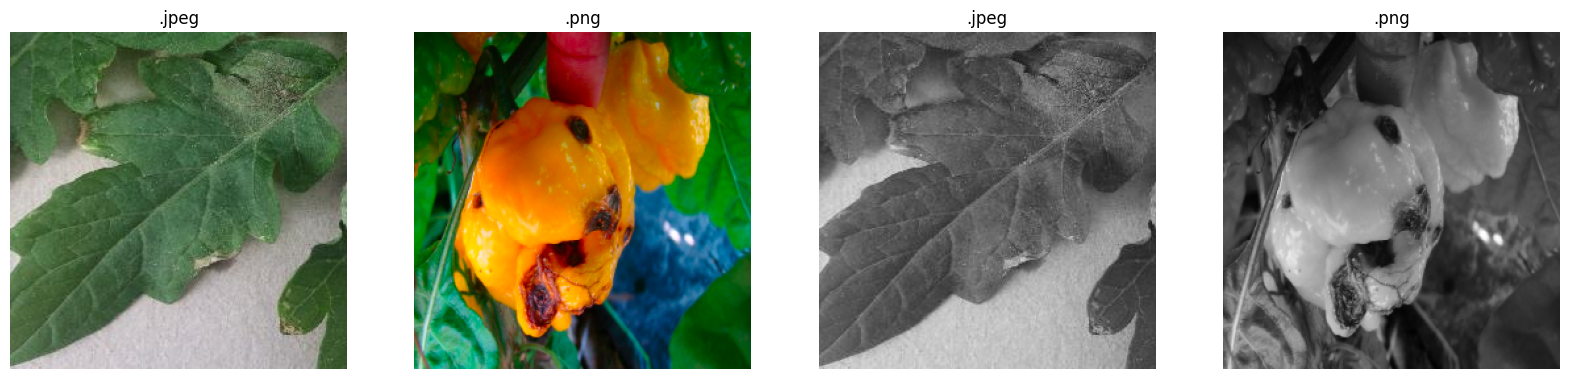

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Filtrer les images avec extension .png ou .jpeg
filtered_df = df_images[df_images['extension'].isin(['.png', '.jpeg'])]

# On prend les 4 premières images
images_to_show = filtered_df.head(4)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, (idx, row) in enumerate(images_to_show.iterrows()):
    img_path = os.path.join(dataset_root, row['modality'], row['species'], row['filename'])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"{row['extension']}")

plt.show()





In [28]:
from pathlib import Path

dataset_root = Path('/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset')
modality = 'color'

# Vérifie l'existence des 5 premiers fichiers
for filename in df_images['filename'].head(5).values:
    file_path = dataset_root / modality / filename
    print(f"{file_path}: Exists? {file_path.exists()}")


/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset/color/6f020ba1-d1a7-41f4-95da-4ca61471b2e6___PSU_CG 2059_final_masked.jpg: Exists? False
/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset/color/db9e6f9e-2f4f-47dc-a576-287166ae6386___PSU_CG 2386_final_masked.jpg: Exists? False
/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset/color/1ae794c7-287b-4a16-9cff-2fa11545eb00___PSU_CG 2102_final_masked.jpg: Exists? False
/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset/color/e1c99066-9ee5-4424-8701-9ee9bea5e229___PSU_CG 2284_final_masked.jpg: Exists? False
/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset/color/8a398af5-59cc-4d7e-9de9-07c5a5bb2cf3___PSU_CG 2116_final_masked.jpg: Exists? False


In [36]:
# Grouper par (width, height) et compter le nombre d’images
df_sizes = df_images.groupby(['width', 'height']).size().reset_index(name='count')

# Trier du plus fréquent au plus rare
df_sizes = df_sizes.sort_values(by='count', ascending=False).reset_index(drop=True)

# Afficher le tableau
print(df_sizes)

   width  height   count
0    256     256  162912
1    324     512       1
2    335     512       1
3    466     512       1
4    470     512       1


In [ ]:

import plotly.express as px

# Palette manuelle avec des couleurs bien distinctes
custom_colors = {
    '.jpg': '#1f77b4',   # bleu
    '.jpeg': '#ff7f0e',  # orange
    '.png': '#2ca02c'    # vert
}

fig = px.scatter(
    df_images,
    x='width',
    y='height',
    color='extension',
    color_discrete_map=custom_colors,
    title='Largeur vs Hauteur des images selon l’extension',
    labels={'width': 'Largeur (px)', 'height': 'Hauteur (px)', 'extension': 'Extension'}
)

fig.update_traces(marker=dict(opacity=0.6, size=5))
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='black'), opacity=0.6))

fig.show()





# les .png ne sont pas visible sous les bleus car que 2.







Nombre d'images avec taille différente de 256x256 : 4


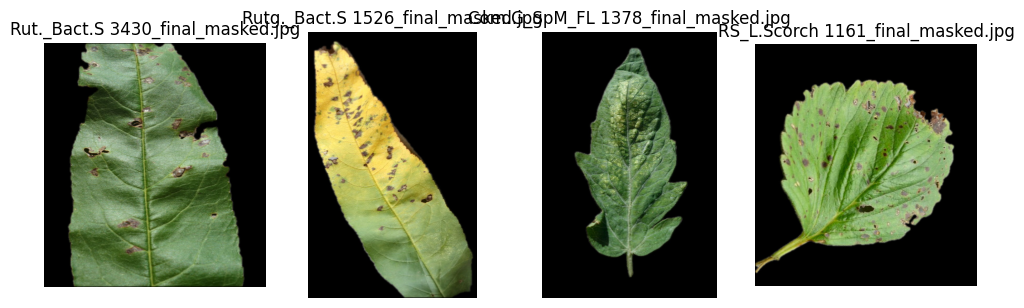

In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

dataset_path = Path("/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset")

# Filtrer les images avec taille différente de 256x256
df_diff_size = df_images[(df_images['width'] != 256) | (df_images['height'] != 256)]

print(f"Nombre d'images avec taille différente de 256x256 : {len(df_diff_size)}")

# Construire le chemin complet pour chaque image en incluant modality et species
df_diff_size = df_diff_size.copy()
df_diff_size['full_path'] = df_diff_size.apply(
    lambda row: str(dataset_path / row['modality'] / row['species'] / row['filename']),
    axis=1
)

# Fonction pour afficher les images
def show_images(paths):
    plt.figure(figsize=(12, 6))
    for i, path in enumerate(paths):
        img = cv2.imread(path)
        if img is None:
            print(f"⚠️ Impossible de charger : {path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(Path(path).name)
        plt.axis('off')
        if i == 9:  # Limite à 10 images max
            break
    plt.tight_layout()
    plt.show()

# Afficher quelques images avec taille différente
show_images(df_diff_size['full_path'].values)



In [ ]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.feature import hog

def extract_features(image_path):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    # Moments de Hu
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)

    # Transformée de Fourier (magnitude moyenne)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-10)
    fourier_mean = magnitude_spectrum.mean()

    # HOG
    hog_features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
    hog_reduced = hog_features[:20]

    return np.concatenate([hu_moments, [fourier_mean], hog_reduced])

def build_feature_dataset(dataset_root):
    modalities = ['color', 'grayscale', 'segmented']
    root = Path(dataset_root)
    records = []

    for mod in modalities:
        mod_path = root / mod
        if not mod_path.exists():
            print(f"⚠️ Le dossier {mod_path} n'existe pas.")
            continue

        for class_dir in mod_path.iterdir():
            if class_dir.is_dir():
                species = class_dir.name.split('___')[0]

                for image_path in class_dir.glob("*.jp*g"):
                    try:
                        features = extract_features(image_path)
                        record = {
                            'species': species,
                            'modality': mod,
                            'image_path': str(image_path)
                        }
                        for i, val in enumerate(features):
                            record[f'feat_{i}'] = val
                        records.append(record)
                    except Exception as e:
                        print(f"Erreur avec {image_path}: {e}")

    df = pd.DataFrame(records)
    return df

# --- Exécution avec ton chemin local ---
if __name__ == "__main__":
    dataset_path = "/workspaces/datasciencetest_reco_plante/dataset/plantvillage/data/plantvillage dataset"

    df = build_feature_dataset(dataset_path)

    print("✅ DataFrame généré :")
    print(df.head())

    print("\nℹ️ Résumé des colonnes :")
    print(df.info())





✅ DataFrame généré :
  species modality                                         image_path  \
0  Squash    color  /workspaces/datasciencetest_reco_plante/datase...   
1  Squash    color  /workspaces/datasciencetest_reco_plante/datase...   
2  Squash    color  /workspaces/datasciencetest_reco_plante/datase...   
3  Squash    color  /workspaces/datasciencetest_reco_plante/datase...   
4  Squash    color  /workspaces/datasciencetest_reco_plante/datase...   

     feat_0    feat_1    feat_2    feat_3  feat_4  feat_5  feat_6  ...  \
0  2.999991  9.625809  9.996004  9.997250   -10.0   -10.0   -10.0  ...   
1  2.836789  8.912999  9.971601  9.979940    10.0   -10.0    10.0  ...   
2  3.006460  9.892541  9.997046  9.997595    10.0    10.0   -10.0  ...   
3  3.012971  9.435001  9.997014  9.997772   -10.0    10.0    10.0  ...   
4  2.867195  8.474847  9.964370  9.999204   -10.0    10.0   -10.0  ...   

    feat_18   feat_19   feat_20   feat_21   feat_22   feat_23   feat_24  \
0  0.148592  0.14618

In [ ]:
df[['species', 'modality', 'feat_0', 'feat_1', 'feat_7']].head()

,species,modality,feat_0,feat_1,feat_7
0,Squash,color,2.999991,9.625809,128.746961
1,Squash,color,2.836789,8.912999,136.712742
2,Squash,color,3.006460,9.892541,133.230652
3,Squash,color,3.012971,9.435001,130.709980
4,Squash,color,2.867195,8.474847,138.069676


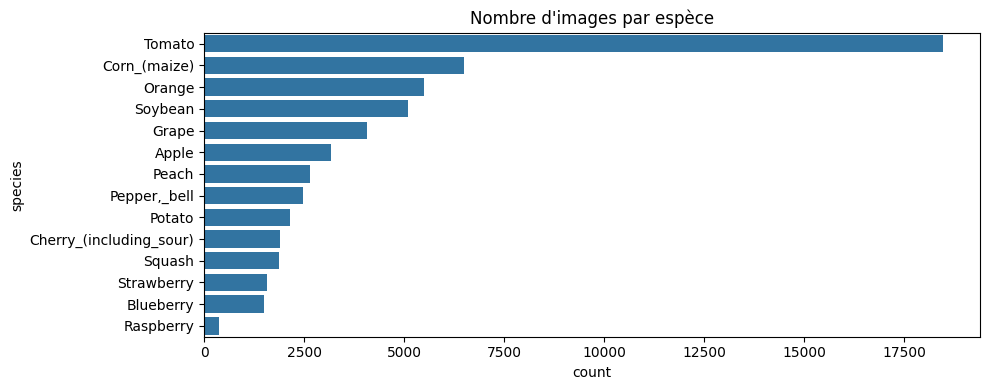

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='species', order=df['species'].value_counts().index)
plt.title("Nombre d'images par espèce")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Répartition par modalité'}, xlabel='modality'>

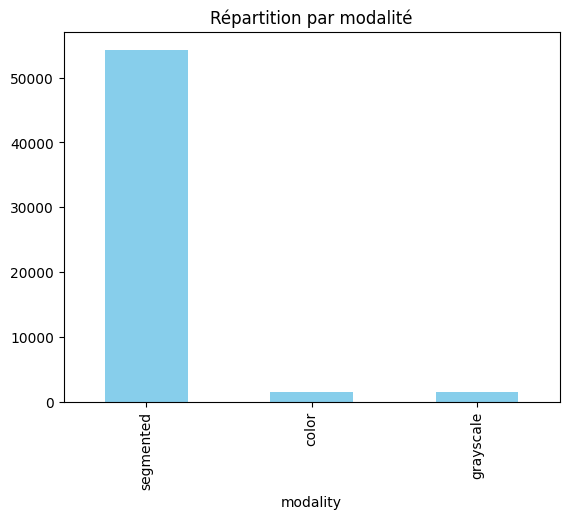

In [ ]:
df['modality'].value_counts().plot(kind='bar', color='skyblue', title="Répartition par modalité")


In [ ]:
# les moments de Hu, la transformée de Fourier, et les HOG, pour enrichir le dataset PlantVillage avec des caractéristiques numériques utiles

# extract_features() :

# Lit chaque image (en niveau de gris),

# Calcule :

# les Moments de Hu (forme globale),

# la magnitude moyenne de la FFT (fréquences),

# un extrait des HOG features (texture),

# Combine tout en un seul vecteur de 28 dimensions environ.

# Tu as généré un DataFrame avec :

# 57 308 images

# Chacune associée à :

# Une espèce de plante (species)

# Une modalité (image color, grayscale, ou segmented)

# Un chemin d'image

# 28 descripteurs visuels :

# feat_0 à feat_6 → Moments de Hu

# feat_7 → Fourier (magnitude moyenne)

# feat_8 à feat_27 → HOG (20 premiers coefficients)


# Moments de Hu (feat_0 → feat_6) :

# Des valeurs log-transformées (souvent entre ~2 et 10)

# Plus ces valeurs sont proches, plus la forme globale est similaire.

# Fourier (feat_7) :

# Une seule valeur qui résume la "texture générale".

# Plus elle est haute, plus l’image a de détails ou de variations.

# HOG (feat_8 à feat_27) :

# Capturent la présence de motifs locaux (bords, orientations)

# Reflètent la "texture directionnelle"


# 1. Moments de Hu (feat_0 à feat_6)
# Ce sont des nombres qui résument la forme générale de la feuille (sa silhouette, sa géométrie).

# Après un traitement mathématique (log-transform), ces valeurs sont souvent entre 2 et 10.

# Si deux feuilles ont des valeurs proches sur ces moments, ça veut dire qu’elles ont des formes assez similaires, même si elles sont tournées ou redimensionnées.

# 2. Transformée de Fourier (feat_7)
# C’est une seule valeur qui donne une idée de la complexité visuelle ou de la "texture" de l’image.

# Une valeur élevée signifie que l’image a beaucoup de détails, de variations, de motifs fins (comme des nervures ou des irrégularités).

# Une valeur basse voudrait dire une image plus simple ou plus uniforme.

# 3. HOG – Histogram of Oriented Gradients (feat_8 à feat_27)
# Ces valeurs décrivent la présence de petits motifs locaux dans l’image, comme les contours, les directions des bords, les textures.

# Ça sert à repérer des caractéristiques fines dans la feuille, par exemple des nervures ou des textures particulières.

# En gros, ça aide à comprendre l’organisation spatiale des détails dans l’image.


# Les 28 features sont composés de 3 parties :
# Index	Type de feature	Description détaillée
# feat_0 à feat_6 (7 valeurs)	Moments de Hu	Ce sont des nombres qui résument la forme globale de l’image. Ils sont invariants à la rotation, translation et mise à l’échelle, donc très utiles pour reconnaître une forme même si elle est tournée ou redimensionnée. Ils capturent la géométrie et la structure générale de l’objet dans l’image.
# feat_7 (1 valeur)	Moyenne du spectre de Fourier	C’est une mesure de la texture moyenne de l’image dans le domaine des fréquences. Elle renseigne sur la présence de motifs répétitifs ou de détails fins dans l’image.
# feat_8 à feat_27 (20 valeurs)	Histogramme des gradients orientés (HOG)	Ce sont des valeurs qui capturent la distribution des bords et contours dans l’image. Ils décrivent les directions et l’intensité des variations de luminosité, ce qui est très utile pour identifier des formes ou des textures locales. Tu prends les 20 premières composantes pour réduire la dimensionnalité.

# En résumé simple :
# 7 valeurs → la forme globale et géométrique (Moments de Hu)

# 1 valeur → la texture globale (Fourier moyenne)

# 20 valeurs → la structure des bords et contours (HOG)

# Pourquoi faire ça ?
# Ces 28 nombres sont un "résumé compact" de chaque image, qu’un algorithme peut utiliser pour :

# différencier les espèces de plantes,

# comparer la similarité entre images,

# entraîner un modèle de machine learning.

# C’est beaucoup plus efficace que d’utiliser directement les pixels bruts, qui sont trop nombreux et sensibles aux variations.

